In [57]:
import matplotlib.pyplot as plt
import numpy as np
import generation_signal
from pycbc.conversions import tau0_from_mass1_mass2

In [58]:
seglen = 4
sample_rate = 2048
fmin = 5.
# Paramètres d'un signal de CBC (16 en tout)
cbc_params = {
            # Paramètres intrinsèques à la source
            'mass1': 38.6,
            'mass2': 29.3,
            'spin1x': 0., 'spin2x': 0.,  'spin1y': 0., 'spin2y': 0.,  'spin1z': 0., 'spin2z': 0.,
            'eccentricity': 0,
            # Paramètres extrinsèques
            'ra': 1.37, 'dec': -1.26, 'distance': 1000,
            'polarization': 2.76, 'inclination': 0,
            'tc': 3.1 , 'coa_phase': 0}

approximant='IMRPhenomD'

para_reels = np.array([cbc_params['tc'],cbc_params['mass1'], cbc_params['mass2'],cbc_params['distance'],
                       cbc_params['ra'], cbc_params['dec'],cbc_params['polarization'],
                       cbc_params['inclination'],cbc_params['spin1z'],cbc_params['spin2z']])

signal = generation_signal.Signal_GW(seglen,sample_rate,fmin,cbc_params,approximant)

tau0 = tau0_from_mass1_mass2(cbc_params['mass1'], cbc_params['mass2'], fmin)
print('Signal duration: ' + format(tau0, '.2f') + 's')

Signal duration: 31.93s


### Importance of having the correct sampling

In [59]:
signal1 = generation_signal.Signal_GW(4,sample_rate,fmin,cbc_params,approximant)
signal_undersampled = signal.signal_ET()

signal2 = generation_signal.Signal_GW(100,sample_rate,fmin,cbc_params,approximant)
signal_oversampled = signal2.signal_ET()

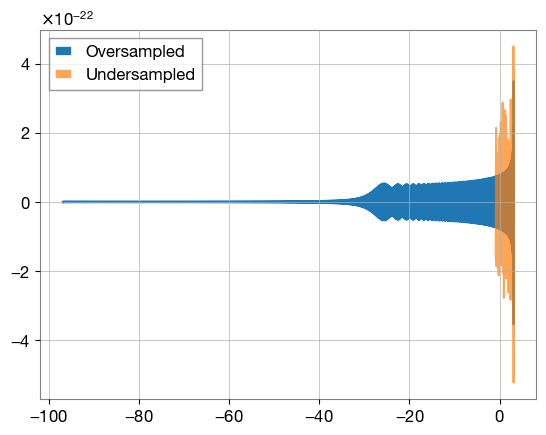

In [63]:
tsd1 = signal_undersampled['E1'].to_timeseries()
tsd2 = signal_oversampled['E1'].to_timeseries()

tsd2 = tsd2.cyclic_time_shift(tsd2.get_sample_times()[-1]-64/2048 - cbc_params['tc'])
tsd1 = tsd1.cyclic_time_shift(tsd1.get_sample_times()[-1]-64/2048 - cbc_params['tc'])

plt.plot(tsd2.get_sample_times(), tsd2, label='Oversampled')
plt.plot(tsd1.get_sample_times(), tsd1, label='Undersampled', alpha=0.7)
plt.legend()

**Interpretation:**
Given the masses and minimal frequency requested, we know that the signal has an approximate duration $\tau_0=31.93$s.

When using a value of *seglen* lower than that, e.g 4s, we generate the signal in the frequency domain with a frequency resolution of 1 / 4 Hz (1 / seglen). However since the actual signal is longer than that, we need a lower frequency resolution to accurately describe it. It is like we compress a 32 s signal into 4s so we lose a lot of information. This is why the blue signal does not look like a CBC signal.


So when generating waveform in the frequency domain, one needs to make sure that the frequency resolution $\Delta f$ requested is low enough such that the segment duration $T=1 / \Delta f$ is larger than the actual duration of the signal. The actual duration of the signal can be approximated by the parameter $\tau_0$ that depends on the chirp mass and minimal frequency.

It is not so much a problem to oversample a signal, that is to take *seglen* larger than the actual signal duration: the corresponding reconstructed signal in the time domain will just be $0$ before the actual start of the signal.